In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [61]:
Lake_Bilancino = pd.read_csv('./datasets/Lake_Bilancino.csv')

In [62]:
Lake_Bilancino

,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
0,03/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
1,04/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2,05/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
3,06/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
4,07/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.44,0.31
...,...,...,...,...,...,...,...,...,...
6598,26/06/2020,0.0,0.0,0.0,0.0,0.0,22.50,250.85,0.60
6599,27/06/2020,0.0,0.0,0.0,0.0,0.0,23.40,250.84,0.60
6600,28/06/2020,0.0,0.0,0.0,0.0,0.0,21.50,250.83,0.60
6601,29/06/2020,0.0,0.0,0.0,0.0,0.0,23.20,250.82,0.60


In [63]:
Lake_Bilancino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  6603 non-null   object 
 1   Rainfall_S_Piero      6026 non-null   float64
 2   Rainfall_Mangona      6026 non-null   float64
 3   Rainfall_S_Agata      6026 non-null   float64
 4   Rainfall_Cavallina    6026 non-null   float64
 5   Rainfall_Le_Croci     6026 non-null   float64
 6   Temperature_Le_Croci  6025 non-null   float64
 7   Lake_Level            6603 non-null   float64
 8   Flow_Rate             6582 non-null   float64
dtypes: float64(8), object(1)
memory usage: 464.4+ KB


In [64]:
Lake_Bilancino.shape

(6603, 9)

### Filled Entries

<AxesSubplot:>

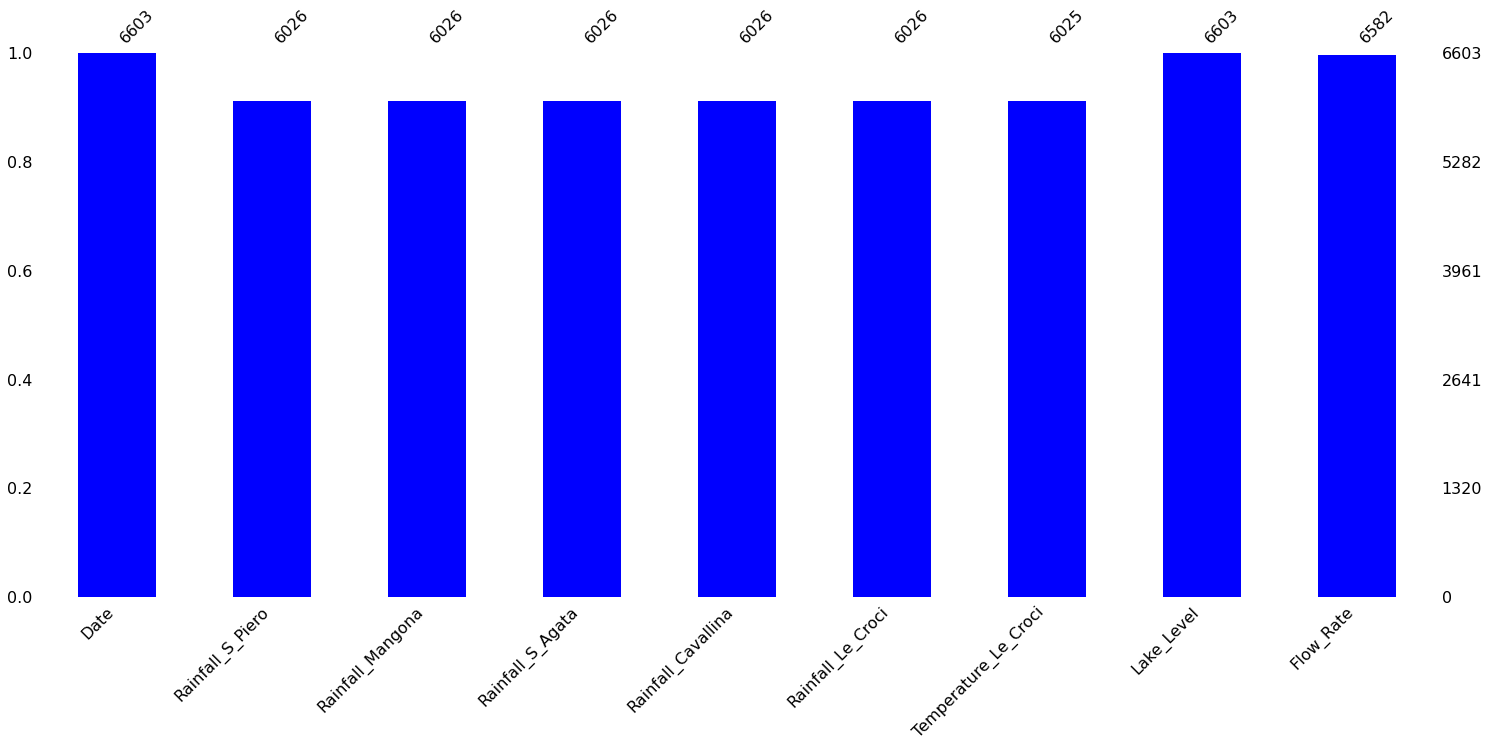

In [65]:
msno.bar(Lake_Bilancino,color='b')

### Dates starting and ending values

In [66]:
print('starting date:', Lake_Bilancino.Date.values[[0,-1]][0])
print('ending date:', Lake_Bilancino.Date.values[[0,-1]][1])


starting date: 03/06/2002
ending date: 30/06/2020


### Position of Null values

<AxesSubplot:>

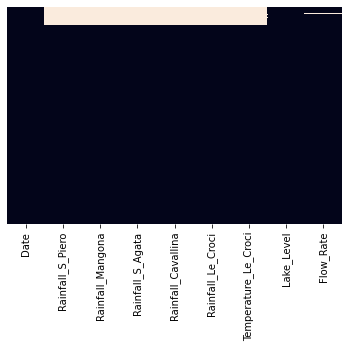

In [67]:
sns.heatmap(Lake_Bilancino.isnull(),yticklabels=False,cbar=False)

In [68]:
data=Lake_Bilancino.copy()
data.drop('Date',axis=1,inplace=True)

### Feature Selection

<AxesSubplot:>

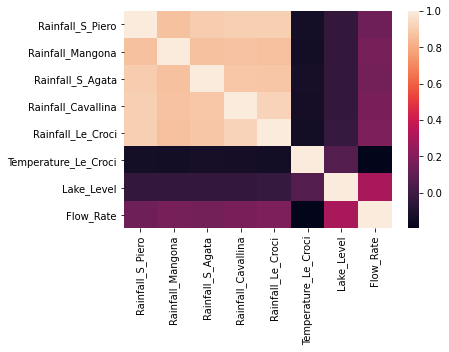

In [69]:
sns.heatmap(data.corr())

In [70]:
file = Lake_Bilancino
features_nan=[features for features in file.columns if file[features].isnull().sum()>1 and file[features].dtypes!='O']
for feature in features_nan:
    print(feature, np.round(file[feature].isnull().mean()*100,4),'% missing ')

Rainfall_S_Piero 8.7385 % missing 
Rainfall_Mangona 8.7385 % missing 
Rainfall_S_Agata 8.7385 % missing 
Rainfall_Cavallina 8.7385 % missing 
Rainfall_Le_Croci 8.7385 % missing 
Temperature_Le_Croci 8.7536 % missing 
Flow_Rate 0.318 % missing 


In [71]:
'''
Columns that are going to be dropped

'Temperature_Le_Croci'

'''

"\nColumns that are going to be dropped\n\n'Temperature_Le_Croci'\n\n"

In [72]:
Lake_Bilancino_corr = Lake_Bilancino.drop(['Temperature_Le_Croci'],axis=1)

<AxesSubplot:>

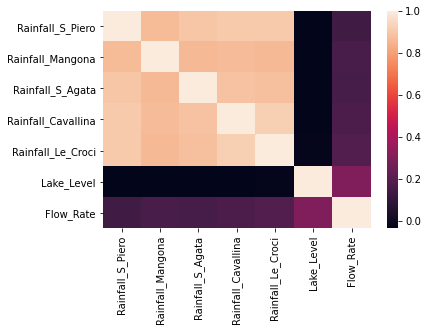

In [73]:
sns.heatmap(Lake_Bilancino_corr.corr())

In [74]:
a = Lake_Bilancino.drop(['Temperature_Le_Croci'],axis=1)

features_nan=[features for features in a.columns if a[features].isnull().sum()>1 and a[features].dtypes!='O']
for feature in features_nan:
    print(feature, np.round(a[feature].isnull().mean()*100,4),'% missing ')

Rainfall_S_Piero 8.7385 % missing 
Rainfall_Mangona 8.7385 % missing 
Rainfall_S_Agata 8.7385 % missing 
Rainfall_Cavallina 8.7385 % missing 
Rainfall_Le_Croci 8.7385 % missing 
Flow_Rate 0.318 % missing 


In [75]:
Lake_Bilancino.drop(['Date','Temperature_Le_Croci'],axis=1)

,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Lake_Level,Flow_Rate
0,NaN,NaN,NaN,NaN,NaN,249.43,0.31
1,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2,NaN,NaN,NaN,NaN,NaN,249.43,0.31
3,NaN,NaN,NaN,NaN,NaN,249.43,0.31
4,NaN,NaN,NaN,NaN,NaN,249.44,0.31
...,...,...,...,...,...,...,...
6598,0.0,0.0,0.0,0.0,0.0,250.85,0.60
6599,0.0,0.0,0.0,0.0,0.0,250.84,0.60
6600,0.0,0.0,0.0,0.0,0.0,250.83,0.60
6601,0.0,0.0,0.0,0.0,0.0,250.82,0.60


### Imputation